In [26]:
# Initial loading/manipulation of respiratory data file
# MDATA CAPSTONE

# Dependences ---------------------------------------------------------------

import os

import pandas as pd
import seaborn as sns


In [4]:

# setting working directory ------------------------------------------------

# os.getcwd()
# os.chdir('C:\\Users\\grad\\Google Drive\\Capstone_Project_2020')

In [3]:


# Reading in data

rp1 = pd.read_csv('RP_MDATA_011520.csv')

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
rp1.head()



C:\Users\Suyash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RunDataId,StartTime,PouchTitle,InstrumentID,ResultType,TargetName,TargetShortName,TargetResult,AssayName,AssayResult,Country,Region,ZipCode,SiteID,FlaggedAsValidation
0,01a5e8c526604e9d351a44675fbb38e182ac2074,2014-12-19 14:08:53,RP,FA2482148,organism,Human Rhinovirus/Enterovirus,HRV/EV,Positive,HRV4,Positive,United States of America,UT,84107,untLabterm,False
1,01a5e8c526604e9d351a44675fbb38e182ac2074,2014-12-19 14:08:53,RP,FA2482148,organism,Human Rhinovirus/Enterovirus,HRV/EV,Positive,HRV1,Positive,United States of America,UT,84107,untLabterm,False
2,01a5e8c526604e9d351a44675fbb38e182ac2074,2014-12-19 14:08:53,RP,FA2482148,organism,Human Rhinovirus/Enterovirus,HRV/EV,Positive,HRV3,Positive,United States of America,UT,84107,untLabterm,False
3,01a5e8c526604e9d351a44675fbb38e182ac2074,2014-12-19 14:08:53,RP,FA2482148,organism,Influenza A H3,FluA H3,Positive,FluA-pan2,Positive,United States of America,UT,84107,untLabterm,False
4,01a5e8c526604e9d351a44675fbb38e182ac2074,2014-12-19 14:08:53,RP,FA2482148,organism,Influenza A H3,FluA H3,Positive,FluA-pan1,Positive,United States of America,UT,84107,untLabterm,False


In [93]:
# parse columns
print(rp1.shape)
rp2 = rp1.query('FlaggedAsValidation == False')
rp2 = rp2.drop(columns=['AssayName', 'AssayResult'])
print(rp2.shape)
rp2['RunDataId'] = rp2['RunDataId'].astype(str)
rp2['ResultType'] = rp2['ResultType'].astype(str)
rp2['TargetName'] = rp2['TargetName'].astype(str)
rp2['TargetResult'] = rp2['TargetResult'].astype(str)
rp2['Country'] = rp2['Country'].astype(str)
rp2['Region'] = rp2['Region'].astype(str)
rp2['ZipCode'] = rp2['ZipCode'].astype(str)
rp2['SiteID'] = rp2['SiteID'].astype(str)
rp2['StartTime']= pd.to_datetime(rp2['StartTime']) 

rp2['year'] = pd.DatetimeIndex(rp2['StartTime']).year
rp2['month'] = pd.DatetimeIndex(rp2['StartTime']).month
# rp2['week'] = pd.DatetimeIndex(rp2['StartTime']).week

rp2.head()

(1114723, 15)
(1003225, 13)


,RunDataId,StartTime,PouchTitle,InstrumentID,ResultType,TargetName,TargetShortName,TargetResult,Country,Region,ZipCode,SiteID,FlaggedAsValidation,year,month
0,01a5e8c526604e9d351a44675fbb38e182ac2074,2014-12-19 14:08:53,RP,FA2482148,organism,Human Rhinovirus/Enterovirus,HRV/EV,Positive,United States of America,UT,84107,untLabterm,False,2014,12
1,01a5e8c526604e9d351a44675fbb38e182ac2074,2014-12-19 14:08:53,RP,FA2482148,organism,Human Rhinovirus/Enterovirus,HRV/EV,Positive,United States of America,UT,84107,untLabterm,False,2014,12
2,01a5e8c526604e9d351a44675fbb38e182ac2074,2014-12-19 14:08:53,RP,FA2482148,organism,Human Rhinovirus/Enterovirus,HRV/EV,Positive,United States of America,UT,84107,untLabterm,False,2014,12
3,01a5e8c526604e9d351a44675fbb38e182ac2074,2014-12-19 14:08:53,RP,FA2482148,organism,Influenza A H3,FluA H3,Positive,United States of America,UT,84107,untLabterm,False,2014,12
4,01a5e8c526604e9d351a44675fbb38e182ac2074,2014-12-19 14:08:53,RP,FA2482148,organism,Influenza A H3,FluA H3,Positive,United States of America,UT,84107,untLabterm,False,2014,12


In [94]:
# remove duplicate columns


#print(rp2.head())
print(rp2.shape)

rp3 = rp2.drop_duplicates()
print(rp3.shape)

(1003225, 15)
(790768, 15)


In [95]:
# number of tests per run id

n_runid = rp3.groupby(['RunDataId', 'StartTime', 'year', 'month']).agg({'TargetShortName':'count'})
#n_runid.shape

n_runid.columns=['TargetShortName']
n_runid.reset_index(drop=False,inplace=True)
n_runid.head()


,RunDataId,StartTime,year,month,TargetShortName
0,00002b0ed56e2c199ec8c3021327229afa70f063,2017-01-26 01:32:54,2017,1,2
1,0000313946b6849745963442c6e572d47cd24ced,2017-01-04 00:43:46,2017,1,2
2,0000801ad1b8c74b57556754b4903942d32161eb,2016-12-08 01:01:08,2016,12,2
3,0000a45ed15492427df603217166f1f813a2cc83,2017-03-10 06:22:35,2017,3,2
4,0000a5b3e2e870e2e194be11ca82c5d9b397ad0c,2015-11-23 12:31:05,2015,11,3


In [96]:
df = n_runid[n_runid['TargetShortName'] > 0]
df.sort_values('StartTime').head()

,RunDataId,StartTime,year,month,TargetShortName
113959,5f7a14b2d12ab2c466a00d9a3dee2c1dddeae81b,2011-11-29 10:08:37,2011,11,2
208918,af35f31db4766616c1056d36b263ebf3246492da,2011-11-29 10:08:37,2011,11,2
211369,b137ce8429a4e825384ccc73911e8575e87de56c,2011-11-29 10:08:37,2011,11,2
174245,9221eb7c28fd88f28fdd2d9100a20e285ab572b0,2011-11-29 10:08:37,2011,11,2
26788,1683e1014d9007a4b9bce2c4c43cafc813c3e36b,2011-12-05 16:46:41,2011,12,4


In [97]:
postive_test_pm = df.groupby(['year', 'month']).agg({'TargetShortName':'count'})
# postive_test_pm
postive_test_pm.columns=['TargetShortName']
postive_test_pm.reset_index(drop=False,inplace=True)
postive_test_pm.head()

,year,month,TargetShortName
0,2011,11,4
1,2011,12,21
2,2012,1,37
3,2012,2,54
4,2012,3,52


In [98]:
postive_test_pm['DATE'] = pd.to_datetime(postive_test_pm[['year','month']].assign(DAY=1))
postive_test_pm['Year_str'] = postive_test_pm['year'].astype(str)
# postive_test_pm['week_str'] = postive_test_pm['week'].astype(str)
# postive_test_pm['Year_str'] = postive_test_pm['year'].astype(str)

# postive_test_pm['combined_yr_wk'] = postive_test_pm['Year_str'] + postive_test_pm['week_str'].zfill(2)
postive_test_pm.head()

# '1'.zfill(2)

,year,month,TargetShortName,DATE,Year_str
0,2011,11,4,2011-11-01,2011
1,2011,12,21,2011-12-01,2011
2,2012,1,37,2012-01-01,2012
3,2012,2,54,2012-02-01,2012
4,2012,3,52,2012-03-01,2012


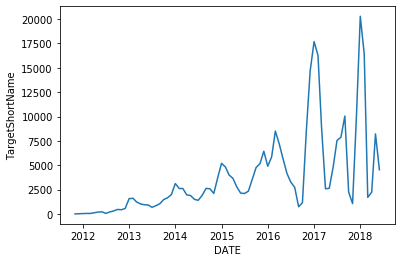

In [99]:
sns.lineplot(x="DATE",y="TargetShortName",data = postive_test_pm)